**CAPSTONE PROJECT - OLADELE JOSHUA OLADIPUPO**

**Project Brief**

Crime in chicago has been worrisome to the Chicago PD. Reported crimes
have been tracked on a daily basis since 2001 and have been provided in
the project data file. The Chicago PD would like to drastically reduce 
the spate of violent crimes reported in the city. Being effective involves 
knowing crime patterns and where they are likely to occur. it also involves
equipping the Police Department appropriately. They have recruited you to 
conduct full data analytics and predictive modelling to uncover insights 
from the data that can be used to effectively mobilize and respond to crimes 
in shorter time cycles. They are interested in gleaning  insights that can 
help them determine what type of crimes to prepare for, where these crimes 
are most likely to occur,what days of the week and periods to expect these crimes.

Conduct complete data analytics and predictive modelling to predict crime tpyes by 
1. Location
2. District
2. Community Area
4. Day_type 

In [1]:
#  1. creating a model to predict crime location

# import data from system folder
import pandas as pd
data = pd.read_csv("C:/Users/DELL/Desktop/Programming/crime_data_Proj1.csv")

# Make a copy of the intial data
dt = data.copy()

# Remove "Unnamed, ID, CASE NUMBER" from the features

del dt['Unnamed: 0'], dt['ID'], dt['Case Number']

#remove duplicates samples
dup = dt.duplicated(keep="first")
dt_1 = dt[~dup] #keep the false values(non-duplicate)

#Encode categorical features
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()

#Encode Arrest
dt_1['Arrest_1'] = dt_1['Arrest'].replace({True:1, False:0})

#Encode Domestic
dt_1['Domestic_1'] = dt_1['Domestic'].replace({True:1, False:0})

#Encode FBI Code
dt_1['FBI Code_1'] = dt_1['FBI Code'].replace({'01A':'01', '01B':'01.5', '04A':'04',
                                               '04B':'04.5', '08A':'08', '08B':'08.5'})

#Encode Block
Block_transformed = lab.fit_transform(dt_1['Block'])
dt_1['Block_1'] = Block_transformed

#Encode Primary Type
primaryType_transformed = lab.fit_transform(dt_1['Primary Type'])
dt_1['Primary Type_1'] = primaryType_transformed

#Encode Description
Description_transformed = lab.fit_transform(dt_1['Description'])
dt_1['Description_1'] = Description_transformed

#Encode Location Description
locationDescription_transformed = lab.fit_transform(dt_1['Location Description'])
dt_1['Location Description_1'] = locationDescription_transformed


# Remove 'Mistyped(strings)' values from IUCR
IUCR_Values = dt_1['IUCR'].unique()
Mistyped_Values = []
for Value in IUCR_Values:
    for Letter in Value:
        if Letter in ['A','B','C','D','E','F','G','H','I','J','K','L','M',
                 'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']:
            Mistyped_Values.append(Value)           
Mistyped_Value_index = []
for Value in Mistyped_Values:
    Mistyped_Value_index.extend(dt_1.loc[dt_1["IUCR"] == Value].index)
    
# dropping index with Mistyped_Value in IUCR
dt_1.drop(Mistyped_Value_index,inplace = True, axis = 0)

#Convert the date from string in the dataframe to actual date

dt_1['Date'] = pd.to_datetime(dt_1['Date'], format = '%m/%d/%Y %I:%M:%S %p')
dt_1['Updated On'] = pd.to_datetime(dt_1['Updated On'], format = '%m/%d/%Y %I:%M:%S %p')

# Create new feature columns(month,day,week,day of the week)

from datetime import datetime as dt
dt_1['month'] = dt_1['Date'].dt.month
dt_1['day'] = dt_1['Date'].dt.day
dt_1['hour'] = dt_1['Date'].dt.hour
dt_1['day of the week'] = dt_1['Date'].dt.dayofweek
dt_1['week'] = dt_1['Date'].dt.isocalendar().week
dt_1['minute'] = dt_1['Date'].dt.minute
dt_1['second'] = dt_1['Date'].dt.second


# Create a new feature column for DayType(weekend or weekday)

WkList = []
for day in dt_1['day of the week']:
    if day in [5,6]:
        WkList.append('Weekend')
    else:
        WkList.append('Weekday') 
dt_1['DayType'] = WkList

# Create a new feature column for difference between the crime Date and 
# the crime updated date(Numbers of days Unclosed)

Numbers_of_days_Unclosed = []
for Date,Upadted_On in zip (dt_1['Date'].dt.date,dt_1['Updated On'].dt.date):
    difference = Upadted_On - Date
    day = difference.days
    Numbers_of_days_Unclosed.append(day)
dt_1['Numbers of days Unclosed'] = Numbers_of_days_Unclosed

# Create a new feature column for DayPeriod(Early Morning, Morning, Afternoon, Evening, Night and late Night )

DayPeriod = []
for hour in dt_1['hour']:
    if hour in [1,2,3,4]:
        DayPeriod.append('Late Night')
    elif hour in [5,6,7,8]:
        DayPeriod.append('Early Morning')
    elif hour in [9,10,11,12]:
        DayPeriod.append('Morning')
    elif hour in [13,14,15,16]:
        DayPeriod.append('Afternoon')
    elif hour in [17,18,19,20]:
        DayPeriod.append('Evening')
    elif hour in [21,22,23,24]:
        DayPeriod.append('Night')
    else:
        DayPeriod.append('unknown') 
dt_1["DayPeriod"] = DayPeriod

# Encoding DayType and DayPeriod

#Encode DayType
DayType = lab.fit_transform(dt_1['DayType'])
dt_1['DayType_1'] = DayType

#Encode DayPeriod
DayPeriod = lab.fit_transform(dt_1['DayPeriod'])
dt_1['DayPeriod_1'] = DayPeriod 

# Recasting features with string values

#Recasting Numbers_of_days_unclosed
dt_1['Numbers of days Unclosed'] = dt_1['Numbers of days Unclosed'].astype(int)

#Recasting IUCR
dt_1['IUCR'] = dt_1['IUCR'].astype(int)

#Recasting FBI Code
dt_1['FBI Code_1'] = dt_1['FBI Code_1'].astype(float)

#Recasting Domestic
dt_1['Domestic_1'] = dt_1['Domestic_1'].astype(int)

#Recasting Arrest
dt_1['Arrest_1'] = dt_1['Arrest_1'].astype(int)

#Recasting Beat
dt_1['Beat'] = dt_1['Beat'].astype(float)

#Recasting District
dt_1['District'] = dt_1['District'].astype(float)

#Recasting Ward
dt_1['Ward'] = dt_1['Ward'].astype(float)

#Recasting Community Area
dt_1['Community Area'] = dt_1['Community Area'].astype(float)

#Recasting X Coordinate
dt_1['X Coordinate'] = dt_1['X Coordinate'].astype(float)

#Recasting Y Coordinate
dt_1['Y Coordinate'] = dt_1['Y Coordinate'].astype(float)

#Recasting Year
dt_1['Year'] = dt_1['Year'].astype(float)

#Recasting Latitude
dt_1['Latitude'] = dt_1['Latitude'].astype(float)

#Recasting Ward
dt_1['Longitude'] = dt_1['Longitude'].astype(float)

#Recasting month
dt_1['month'] = dt_1['month'].astype(int)

#Recasting day
dt_1['day'] = dt_1['day'].astype(int)

#Recasting hour
dt_1['hour'] = dt_1['hour'].astype(int)

#Recasting day of the week
dt_1['day of the week'] = dt_1['day of the week'].astype(int)

#Recasting week
dt_1['week'] = dt_1['week'].astype(int)

#Recasting minute
dt_1['minute'] = dt_1['minute'].astype(int)

#Recasting second
dt_1['second'] = dt_1['second'].astype(int)


# Transformed/Encoded Data (decoded Data : Encoded Data)

# for a,b in zip(dt_1['Primary Type'].unique(),dt_1['Primary Type_1'].unique()):
#     print(a,':',b)   
# for c,d in zip(dt_1['Case Number'].unique(),dt_1['Case Number_1'].unique()):
#     print(c,':',d)   
# for e,f in zip(dt_1['Block'].unique(),dt_1['Block_1'].unique()):
#     print(e,':',f)   
# for g,h in zip(dt_1['Description'].unique(),dt_1['Description_1'].unique()):
#     print(g,':',h)   
# for i,j in zip(dt_1['Location Description'].unique(),dt_1['Location Description_1'].unique()):
#     print(i,':',j)   
# for k,l in zip(dt_1['Arrest'].unique(),dt_1['Arrest_1'].unique()):
#     print(k,':',l)   
# for m,n in zip(dt_1['Updated'].unique(),dt_1['Updated On_1'].unique()):
#     print(m,':',n) 


# Remove "Date, 'Block','Arrest', 'Domestic','Description', 'FBI Code','Location Description','week', 
# 'DayType', 'DayPeriod', 'minute', 'second','hour','Location', 'Updated On, 'Primary Type'  from the features

dt_2 = dt_1.copy()

features = ['Date', 'Block','Arrest', 'Domestic','Description', 'FBI Code','Location Description','week', 
      'DayType', 'DayPeriod', 'minute', 'second','hour','Location', 'Updated On', 'Primary Type']

for feature in features:
    del dt_2[feature]

df = dt_2

#dropping the missing values from the data
df.dropna(inplace = True)

# arranging the index values
df = df.reset_index(drop = True)

# Removing Outliers

# Defining a function to remove outliers
def outliers(data,feature):
    Lower_Quartile = data[feature].quantile(0.25)  
    Upper_Quartile = data[feature].quantile(0.75)
    Inter_Quartile_Range = Upper_Quartile - Lower_Quartile
    
    Lower_Bound = Lower_Quartile - 1.5 * Inter_Quartile_Range 
    Upper_BOund = Upper_Quartile + 1.5 * Inter_Quartile_Range
    
    Outliers_Index = data.index[ (data[feature] < Lower_Bound) |  (data[feature] > Upper_BOund)]
    return Outliers_Index

Outliers_Index = []
for i in df.columns:
    Outliers_Index.extend(outliers(df, i))
index = set(Outliers_Index)

# dropping outliers from the data
df.drop(index, inplace = True, axis = 0)

# # visualization of the data for possible outliers

# #using boxplot

# import seaborn as sb
# import matplotlib.pyplot as plt

# plt.figure(figsize = (15, 20))
# plt.gcf().set_size_inches(15,35)
# for i in range (len(df.columns)):
#     plt.subplot(9, 3, i+1)
#     sb.boxplot(x = df.iloc[:, i])
#     plt.xlabel(df.columns[i], size = 16)

# # using density plot

# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,15))
# df.plot(kind = "density", subplots = True, layout = (7,3), sharex = False)
# plt.gcf().set_size_inches(20,20)
# plt.show()

# Rescale the data

New_df = df[['IUCR','Beat', 'District',
       'Ward', 'Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1', 'Latitude', 'Longitude']].reset_index(drop = True)

New_columns = ['IUCR','Beat', 'District',
       'Ward', 'Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1']

from sklearn.preprocessing import MinMaxScaler
df_array = New_df.values
X_values = df_array[:,0:21]
Y_value =  df_array[:,21:23]
demo = MinMaxScaler(feature_range=(0,1))
Rescaled_dt = demo.fit_transform(X_values)
Rescaled_df = pd.DataFrame(Rescaled_dt, columns = New_columns)
Rescaled_df[['Latitude', 'Longitude']] = New_df[['Latitude', 'Longitude']]


cleaned_data = Rescaled_df

# saving cleaned data to system
# cleaned_data.to_csv('C:/Users/DELL/Desktop/Programming/project-cleaned-data.csv', index = None)

#BUILDING MODEL

# Remove 'X Coordinate' and 'Y Coordinate' from the data when predicting location
# because they automatically state the Location

cleaned_data_1 = cleaned_data[['IUCR','Beat', 'District',
       'Ward', 'Community Area', 'Year', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1', 'Latitude', 'Longitude']]

# features selection for creating a model to predict Crime Location('Latitude and Longitude')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

array_cleaned_data = cleaned_data_1.values
X = array_cleaned_data[:,0:19]
Y = array_cleaned_data[:,19:21]
model = LinearRegression()
rfe = RFE(model)
demo = rfe.fit(X,Y)

# print("Num Features: {}". format(demo.n_features_))
# print("Selected Features{}:". format(demo.support_))
# print("Features Ranking: {}". format(demo.ranking_))

# select features efficient for the model

Selected_features = list(cleaned_data.columns[0:19][(demo.support_)])

print(f"Selected Features for the model are:\n{Selected_features}\n")

Selected_Features = Selected_features.extend(['Latitude', 'Longitude'])
New_dt = cleaned_data[Selected_features]

# import algorithm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 0))

# Make Model
from sklearn.model_selection import train_test_split
from numpy import set_printoptions
array = New_dt.values
X = array[:,0:9]
y = array[:,9:11]

# Make pipeline
from sklearn.pipeline import make_pipeline
model_Location = make_pipeline(model)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

model_Location.fit(X_train,y_train)

scoreTrain = model_Location.score(X_train,y_train)
scoreTest = model_Location.score(X_test,y_test)

set_printoptions(precision=2)

print(f"Score Test : {scoreTest*100}%, Score Train: {scoreTrain*100}%\n")


from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import accuracy_score

MAE = mean_absolute_error(model_Location.predict(X_test),y_test)
print(f'the mean absolute error is : {MAE}\n')

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(model_Location.predict(X_test),y_test)

RMSE = math.sqrt(MSE)
print(f'the Root Mean Square error is: {RMSE}')

C:\Users\DELL\AppData\Local\Temp/ipykernel_12828/2574518841.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_1['Arrest_1'] = dt_1['Arrest'].replace({True:1, False:0})
C:\Users\DELL\AppData\Local\Temp/ipykernel_12828/2574518841.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_1['Domestic_1'] = dt_1['Domestic'].replace({True:1, False:0})
C:\Users\DELL\AppData\Local\Temp/ipykernel_12828/2574518841.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Selected Features for the model are:
['IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Primary Type_1']

Score Test : 98.16402855213057%, Score Train: 98.16604127569325%

the mean absolute error is : 0.006333957373080115

the Root Mean Square error is: 0.008415437851670092


In [2]:
# Predicting Location using the data with missing values

Missing_Values = list(dt_1[dt_1['Location'].isnull()].index)
Location_Missing_Data = dt_1.loc[Missing_Values, :]
Location = Location_Missing_Data[['IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'Arrest_1', 'Domestic_1',
                                  'FBI Code_1', 'Primary Type_1']].reset_index(drop=True)
Location.dropna(inplace=True)
from sklearn import preprocessing
Rescaled_Location = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(Location)
print(Rescaled_Location)
predict_Location = pd.DataFrame(model_Location.predict(Rescaled_Location), columns = ['Latitude', 'Longitude'])
predict_Location['Location'] = [(a,b) for a,b in zip(predict_Location['Latitude'],predict_Location['Longitude'])]
predict_Location

[[0.38 0.   0.   ... 0.   0.67 0.53]
 [0.36 0.42 0.42 ... 0.   0.67 0.53]
 [0.32 0.09 0.08 ... 0.   0.67 0.53]
 ...
 [0.18 0.42 0.42 ... 0.   0.38 0.26]
 [0.53 0.38 0.37 ... 1.   1.   0.74]
 [0.12 0.29 0.29 ... 0.   0.17 0.97]]


,Latitude,Longitude,Location
0,41.879353,-87.638517,"(41.87935325599193, -87.63851689596156)"
1,41.877663,-87.698446,"(41.87766262505767, -87.69844610659636)"
2,41.778543,-87.611020,"(41.7785427991481, -87.61101968083575)"
3,41.761921,-87.575098,"(41.7619208017448, -87.57509774019853)"
4,41.921234,-87.646103,"(41.92123350194423, -87.64610340736596)"
...,...,...,...
20827,41.691213,-87.629309,"(41.69121258989899, -87.62930929918515)"
20828,41.954258,-87.675040,"(41.95425832990779, -87.6750396860962)"
20829,41.877663,-87.687951,"(41.87766262505767, -87.68795096948035)"
20830,41.859814,-87.692028,"(41.859813534027325, -87.69202802714204)"


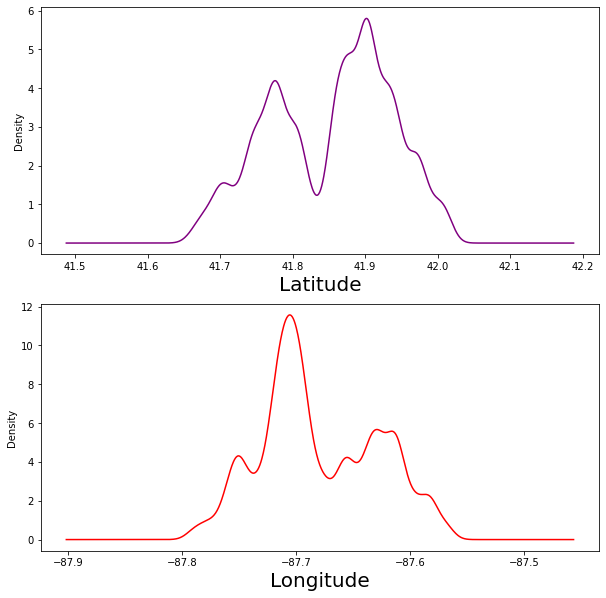

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 20))
plt.gcf().set_size_inches(10,10)
for i in range (len(predict_Location.columns)-1):
    plt.subplot(2,1,i+1)
    colors = ['purple', 'red']
    (predict_Location.iloc[:, i]).plot(kind='density', color = colors[i])
    plt.xlabel(predict_Location.columns[i], size = 20)

In [4]:
# 2. Creating a model to predict crime type by Disctrict

# Rescale the data

# dropping Longitude and Latitude from the data, because they gives much info about the district
# (knowing the location is knowing the district)
# dropping domestic from the data(it has only one value - 0 )

New_df2 = New_df[['IUCR','Beat','Ward', 'Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1','FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1','District']].reset_index(drop = True)

New_columns2 = ['IUCR','Beat','Ward','Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1','FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1']

from sklearn.preprocessing import MinMaxScaler
df_array2 = New_df2.values
X_value2 = df_array2[:,0:-1]
Y_value2 =  df_array2[:,-1]
demo2 = MinMaxScaler(feature_range=(0,1))
Rescaled_dt2 = demo2.fit_transform(X_value2)
Rescaled_df2 = pd.DataFrame(Rescaled_dt2, columns = New_columns2)
Rescaled_df2['District'] = New_df2['District']

cleaned_data2 = Rescaled_df2

# features selection for creating a model to predict crime type by District
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

array_clean_data = cleaned_data2.values
X2 = array_clean_data[:,0:-1]
Y2 = array_clean_data[:,-1]
model = LinearRegression()
rfe2 = RFE(model)
demo2 = rfe2.fit(X2,Y2)

# print("Num Features: {}". format(demo2.n_features_))
# print("Selected Features{}:". format(demo2.support_))
# print("Features Ranking: {}". format(demo2.ranking_))

# select features efficient for the model


Selected_features2 = list(cleaned_data2.columns[:-1][(demo2.support_)])

print(f"Selected Features for the model are:\n{Selected_features2}\n")

SelectedFeatures2 = Selected_features2.append("District")

New_dp = cleaned_data2[Selected_features2]

# Make Model

from sklearn.model_selection import train_test_split

array = New_dp.values
X = array[:,0:-1]
y = array[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from numpy import set_printoptions

model = DecisionTreeClassifier() #blank model

# Make pipeline
from sklearn.pipeline import make_pipeline
model_District = make_pipeline(model)

model_District.fit(X_train,y_train)

scoreTrain = model_District.score(X_train,y_train)
scoreTest = model_District.score(X_test,y_test)
MAE = mean_absolute_error(model_District.predict(X_test),y_test)

set_printoptions(precision=2)
print(f"{scoreTest*100}%,  {scoreTrain*100}%\n")

print(f'the mean absolute error is : {MAE}\n')

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(model_District.predict(X_test),y_test)

RMSE = math.sqrt(MSE)
print(f'the Root Mean Square error is: {RMSE}')

Selected Features for the model are:
['IUCR', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Block_1', 'Primary Type_1', 'Location Description_1', 'Numbers of days Unclosed']

99.95873706082199%,  100.0%

the mean absolute error is : 0.002540707879336274

the Root Mean Square error is: 0.17658367906701755


In [5]:
# Testing external variable on the model for predicting crime District

# New input
# Sample_Data = ['IUCR', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Block_1', 
#                     'Primary Type_1', 'Location Description_1', 'Numbers of days Unclosed']

Sample_Data = [560,1421.0,26.0,1154749.0,1912266.0,'018XX N KEDZIE AVE','ASSAULT','APARTMENT',1746]

# Getting the encoded value of the data

Sample_Data_Encoded = Sample_Data[:5]

for Block,Block_Encoded in zip(dt_1['Block'].unique(),dt_1['Block_1'].unique()) :
    for value in Sample_Data:
        if Block == value:
            Sample_Data_Encoded.append(Block_Encoded)
            
for Primary_Type,Primary_Type_Encoded in zip(dt_1['Primary Type'].unique(),dt_1['Primary Type_1'].unique()):
    for value in Sample_Data:
        if Primary_Type == value:
            Sample_Data_Encoded.append(Primary_Type_Encoded)        

for Description,Description_Encoded in zip(dt_1['Location Description'].unique(),dt_1['Location Description_1'].unique()):
    for value in Sample_Data:
        if Description == value:
            Sample_Data_Encoded.append(Description_Encoded)

Sample_Data_Encoded.append(Sample_Data[-1])                    
            
# Rescaling the sample data into the size of the testing data on the model
from numpy import set_printoptions
Rescaled_Sample_Data = []

# using the non-rescaled data to rescale the sample_data

New = New_df[['IUCR', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Block_1', 
                    'Primary Type_1', 'Location Description_1', 'Numbers of days Unclosed']]
for a,b in zip(range(0,9),New.columns):
    Rescaled_Sample_Data.append((Sample_Data_Encoded[a] - New[b].min()) / (New[b].max() - New[b].min()))

# make predictions using the model for predicting location    
Predict =  model_District.predict([Rescaled_Sample_Data])
Crime_District = Predict
set_printoptions(precision = 3)
print(f"Crime_District is {Predict[0]}")

Crime_District is 14.0


In [6]:
# Predicting District using the data with missing values

Missing_Values = list(dt_1[dt_1['District'].isnull()].index)
District_Missing_Data = dt_1.loc[Missing_Values, :]
District = District_Missing_Data[['IUCR', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate', 'Block_1', 
        'Primary Type_1', 'Location Description_1', 'Numbers of days Unclosed']].reset_index(drop=True)
District.dropna(inplace=True)
from sklearn import preprocessing
Rescaled_District = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(District)
print(Rescaled_District)
predict_District = pd.DataFrame(model_District.predict(Rescaled_District), columns = ['District'])
predict_District

[[0.086 0.078 0.318 0.998 0.255 0.796 0.    0.    0.048]
 [0.641 0.369 0.364 0.131 0.462 0.562 0.25  0.051 0.035]
 [1.    0.41  0.5   0.    0.583 0.    0.781 1.    0.015]
 [0.025 0.248 0.    0.77  0.223 0.101 0.031 1.    0.01 ]
 [0.411 0.709 0.818 0.919 0.633 0.03  1.    0.878 0.008]
 [0.822 0.949 1.    0.306 1.    0.828 0.156 0.718 0.   ]
 [0.    0.    0.818 1.    0.601 0.093 0.031 0.718 1.   ]
 [0.363 1.    0.545 0.135 0.684 0.227 1.    0.013 0.003]
 [0.66  0.874 0.636 0.701 0.    1.    0.25  0.833 0.389]
 [0.43  0.663 0.75  0.081 0.884 0.638 0.5   1.    0.062]
 [0.813 0.41  0.477 0.128 0.653 0.155 0.156 0.013 0.1  ]
 [0.096 0.539 0.455 0.334 0.675 0.195 0.    0.968 0.028]]


,District
0,3.0
1,10.0
2,11.0
3,3.0
4,18.0
5,24.0
6,1.0
7,25.0
8,22.0
9,16.0


In [7]:
# 3. Creating a model to predict crime type by community Area

# Rescale the data

# dropping Longitude and Latitude from the data
# dropping ward from the data
# dropping domestic from the data

New_df3 = New_df[['IUCR','Beat','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1','District','Community Area']].reset_index(drop = True)

New_columns3 = ['IUCR','Beat','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1','FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'day of the week','Numbers of days Unclosed', 
       'DayType_1', 'DayPeriod_1','District']

from sklearn.preprocessing import MinMaxScaler
df_array3 = New_df3.values
X_value3 = df_array3[:,0:-1]
Y_value3 =  df_array3[:,-1]
demo3 = MinMaxScaler(feature_range=(0,1))
Rescaled_dt3 = demo3.fit_transform(X_value3)
Rescaled_df3 = pd.DataFrame(Rescaled_dt3, columns = New_columns3)
Rescaled_df3['Community Area'] = New_df3['Community Area']

cleaned_data3 = Rescaled_df3

# features selection for creating a model to predict crime type by Community Area
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
# from sklearn.naive_bayes import GaussianNB

array_clean_data = cleaned_data3.values
X3 = array_clean_data[:,0:-1]
Y3 = array_clean_data[:,-1]
model = Ridge()
rfe3 = RFE(model)
demo3 = rfe3.fit(X3,Y3)

# print("Num Features: {}". format(demo3.n_features_))
# print("Selected Features{}:". format(demo3.support_))
# print("Features Ranking: {}". format(demo3.ranking_))

# select features efficient for the model


Selected_features3 = list(cleaned_data3.columns[:-1][(demo3.support_)])

print(f"Selected Features for the model are:\n{Selected_features3}\n")

SelectedFeatures3 = Selected_features3.append('Community Area')

New_dp = cleaned_data3[Selected_features3]

# Make Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
array = New_dp.values
X = array[:,0:-1]
y = array[:,-1]
num_folds = 6
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = num_folds)
model_Community_Area  = GaussianNB()
Scoring = 'neg_mean_absolute_error'
Scoring1 = 'neg_root_mean_squared_error'

results = cross_val_score(model_Community_Area , X,y, cv=kfold)
negative_mean_absolute_errors = cross_val_score(model_Community_Area , X,y, cv=kfold, scoring = Scoring)
negative_root_mean_square = cross_val_score(model_Community_Area , X,y, cv=kfold, scoring = Scoring1)

accuracy = np.mean(results)
negative_mean_absolute_error = np.mean(negative_mean_absolute_errors)
negative_root_mean_square  = np.mean(negative_root_mean_square)

print(f"Training Accuracy is : {accuracy*100}% \n")
print(f"Mean_absolute_error is : {negative_mean_absolute_error * (-1)}\n")
print(f"Root_mean_square is : {negative_root_mean_square * (-1)}")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model_Community_Area.fit(X_train,y_train)

Selected Features for the model are:
['IUCR', 'Beat', 'X Coordinate', 'Y Coordinate', 'Arrest_1', 'Block_1', 'Location Description_1', 'Numbers of days Unclosed', 'District']

Training Accuracy is : 73.98821322114706% 

Mean_absolute_error is : 1.7663616840499021

Root_mean_square is : 7.234949331337685


GaussianNB()

In [8]:
# Predicting Community_Area using the data with missing values

Missing_Values = list(dt_1[dt_1['Community Area'].isnull()].index)
Community_Area_Missing_Data = dt_1.loc[Missing_Values, :]
Community_Area = Community_Area_Missing_Data[['IUCR', 'Beat', 'X Coordinate', 'Y Coordinate', 'Arrest_1', 'Block_1', 
                    'Location Description_1', 'Numbers of days Unclosed', 'District']].reset_index(drop=True)
Community_Area.dropna(inplace=True)
from sklearn import preprocessing
Rescaled_Community_Area = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(Community_Area)
print(Rescaled_Community_Area)
predict_Community_Area = pd.DataFrame(model_Community_Area.predict(Rescaled_Community_Area), columns = ['Community_Area'])
predict_Community_Area

[[0.143 0.826 0.705 ... 0.864 0.582 0.033]
 [0.071 0.826 0.728 ... 0.177 0.75  0.   ]
 [0.206 0.253 0.636 ... 0.732 0.607 0.2  ]
 ...
 [0.071 0.665 0.459 ... 0.732 0.57  0.533]
 [0.143 0.876 0.669 ... 0.732 0.62  0.7  ]
 [0.071 0.583 0.388 ... 0.732 0.579 0.467]]


,Community_Area
0,35.0
1,35.0
2,68.0
3,60.0
4,19.0
...,...
174569,28.0
174570,27.0
174571,16.0
174572,75.0


In [34]:
# 4. creating a model to predict crime type by day type('DayType_1')

# Rescale the data
#Remove day of the week(It automatically state the day type)

New_df4 =  New_df[['IUCR','Beat','Ward', 'Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day', 'Numbers of days Unclosed', 
        'District','DayPeriod_1','Latitude','Longitude','DayType_1']].reset_index(drop = True)

New_columns4 = ['IUCR','Beat','Ward', 'Community Area','X Coordinate', 'Y Coordinate',
       'Year', 'Arrest_1', 'Domestic_1', 'FBI Code_1', 'Block_1', 
       'Primary Type_1','Description_1', 'Location Description_1',
        'month', 'day','Numbers of days Unclosed', 
         'District','DayPeriod_1','Latitude','Longitude']

from sklearn.preprocessing import MinMaxScaler
df_array4 = New_df4.values
X_value4 = df_array4[:,0:-1]
Y_value4 =  df_array4[:,-1]
demo4 = MinMaxScaler(feature_range = (0,1))
Rescaled_dt4 = demo4.fit_transform(X_value4)
Rescaled_df4 = pd.DataFrame(Rescaled_dt4, columns = New_columns4)
Rescaled_df4['DayType_1'] = New_df4['DayType_1']

cleaned_data4 = Rescaled_df4

# features selection for creating a model to predict crime type by day type(DayType_1)
#using permutation importance

from sklearn.inspection import permutation_importance
model = LinearRegression()
model.fit(X4,Y4)
result = permutation_importance(model,X4,Y4)

Selected_features4 = []
for value,feature in zip(result["importances_mean"], New_columns4):
    if value > 1.307e-04:
        Selected_features4.append(feature)
print(Selected_features4)

SelectedFeatures4 = Selected_features4.append('DayType_1')

New_ds = cleaned_data4[Selected_features4]

# Make Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
array = New_ds.values
X = array[:,0:-1]
y = array[:,-1]
num_folds = 4
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = num_folds)
model = GaussianNB()
Scoring = 'neg_mean_absolute_error'
Scoring1 = 'neg_mean_absolute_percentage_error'

results = cross_val_score(model, X,y, cv=kfold)
negative_mean_absolute_errors = cross_val_score(model, X,y, cv=kfold, scoring = Scoring)

accuracy = np.mean(results)

negative_mean_absolute_error = np.mean(negative_mean_absolute_errors)

print(f"{accuracy*100}%, {negative_mean_absolute_error}") 

['IUCR', 'Beat', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'month', 'District', 'DayPeriod_1', 'Latitude', 'Longitude', 'DayType_1']
72.90232546408784%, -0.27097674535912164


In [35]:
# GaussianNB Hyperparameter tuning using GridSearchCV

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1000)

cv_method = RepeatedStratifiedKFold(n_splits = 5,  n_repeats = 3, random_state = 999)
step = [('GaussianNB', GaussianNB())]

Pipe = Pipeline(step)

params = {'GaussianNB__priors':[None], 'GaussianNB__var_smoothing':np.logspace(0.001,1,10)}
# Pipe.get_params().keys()

grid_cv = GridSearchCV(estimator = Pipe, param_grid = params, cv = cv_method, verbose = 1, scoring = 'accuracy')
model_day_type = grid_cv.fit(X_train,y_train)

# grid_cv.best_params_
# grid_cv.cv_results_['params']

Fitting 15 folds for each of 10 candidates, totalling 150 fits
